קובץ ראשון של ניסיון עבודה עם tensorflow
1- הורדת ערכים חורגים על מנת לנסות להתיחס רק למידע רלוונטי- אבדוק את ההשפעה של זה גם על שאר המודלים
2- נירמול הנתונים על מנת שאף נתון לא יקבל משקל גבוה מידי
3- הפיכת ערכי הדיאגנוזה מאותיות למספרים
4- בניית המודל- ערכי הייפר פרמטר כרגע הם סתם ערכים שלקחתי מדוגמא השלב הבא יהיה לבדוק איך שינוי שלהם יביא לתוצאה אידיאלית
הערה- יש שימוש ב3 קבוצות של נתונים קבוצת אימון, קבוצת בקרה- בעזרתה המודל ישווה תוצאות וישפר את המשקולות וקבוצת מבחן בה משתמשים רק בסוף
5- הערכת המודל 
אחוזי ההצלחה כרגע הם 95% עבור סט המבחן וערך 
f1 97
(מודה שעדיין לא הבנתי בדיוק מה המשמעות שלו)

In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [129]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt  # Import matplotlib for data visualisation
import seaborn as sns  # Statistical data visualization



In [130]:
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
data =data.iloc[:,1:-1]

In [131]:
data2=data.iloc[:,1:]

# remove ecxeptional values

[Text(0, 0, 'radius_mean'),
 Text(0, 0, 'texture_mean'),
 Text(0, 0, 'perimeter_mean'),
 Text(0, 0, 'area_mean'),
 Text(0, 0, 'smoothness_mean'),
 Text(0, 0, 'compactness_mean'),
 Text(0, 0, 'concavity_mean'),
 Text(0, 0, 'concave points_mean'),
 Text(0, 0, 'symmetry_mean'),
 Text(0, 0, 'fractal_dimension_mean'),
 Text(0, 0, 'radius_se'),
 Text(0, 0, 'texture_se'),
 Text(0, 0, 'perimeter_se'),
 Text(0, 0, 'area_se'),
 Text(0, 0, 'smoothness_se'),
 Text(0, 0, 'compactness_se'),
 Text(0, 0, 'concavity_se'),
 Text(0, 0, 'concave points_se'),
 Text(0, 0, 'symmetry_se'),
 Text(0, 0, 'fractal_dimension_se'),
 Text(0, 0, 'radius_worst'),
 Text(0, 0, 'texture_worst'),
 Text(0, 0, 'perimeter_worst'),
 Text(0, 0, 'area_worst'),
 Text(0, 0, 'smoothness_worst'),
 Text(0, 0, 'compactness_worst'),
 Text(0, 0, 'concavity_worst'),
 Text(0, 0, 'concave points_worst'),
 Text(0, 0, 'symmetry_worst'),
 Text(0, 0, 'fractal_dimension_worst')]

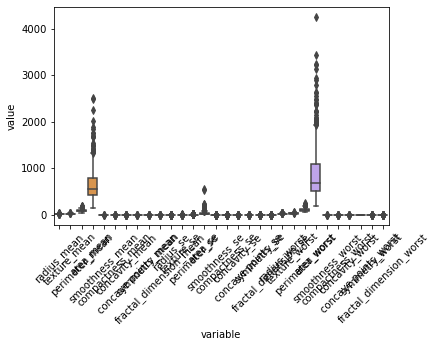

In [132]:
chart = sns.boxplot(x="variable", y="value", data=pd.melt(data2))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [133]:
from scipy.stats import zscore
z0 = data2.apply(zscore)
z0.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,1.490704e-16,2.544342e-16,-1.338511e-16,-8.429110e-17,2.081912e-16,5.408679e-16,...,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.189227e-16,-2.579464e-16,1.143393e-16,2.829215e-16,1.670212e-16,2.321908e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [134]:
z = np.abs(zscore(data2))
z_in = (np.abs(zscore(data2)) < 3)
data_clean = data[z_in.all(axis=1)]

In [135]:
data_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


In [136]:
x = data_clean.iloc[:,1:]
y = data_clean.iloc[:,0]
y

1      M
2      M
4      M
5      M
6      M
      ..
560    B
563    M
564    M
565    M
566    M
Name: diagnosis, Length: 495, dtype: object

# changing labels from letters to numbers

In [137]:
d = pd.get_dummies(y)
d

,B,M
1,0,1
2,0,1
4,0,1
5,0,1
6,0,1
...,...,...
560,1,0
563,0,1
564,0,1
565,0,1


In [138]:
y = d.drop('M', axis=1)
y

,B
1,0
2,0
4,0
5,0
6,0
...,...
560,1
563,0
564,0
565,0


In [139]:
x_standard = x.apply(zscore)
x_standard.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,...,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02,4.950000e+02
mean,-2.130731e-17,-6.836282e-16,3.016667e-16,3.868959e-16,2.395390e-16,4.653404e-16,-3.734387e-17,-2.879851e-16,5.640830e-16,9.124015e-16,...,-2.444734e-17,3.319455e-16,1.195452e-16,-3.476456e-17,3.696258e-16,2.198017e-17,1.836914e-16,9.016357e-17,4.140347e-16,-3.575142e-16
std,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,...,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00,1.001012e+00
min,-2.265906e+00,-2.316814e+00,-2.221132e+00,-1.671637e+00,-2.542368e+00,-1.836745e+00,-1.203042e+00,-1.331778e+00,-2.621163e+00,-2.133485e+00,...,-1.918466e+00,-2.320086e+00,-1.893340e+00,-1.404700e+00,-2.355598e+00,-1.568805e+00,-1.410104e+00,-1.833805e+00,-2.565005e+00,-1.835705e+00
25%,-6.986934e-01,-7.293290e-01,-6.959128e-01,-6.901750e-01,-7.595994e-01,-7.904218e-01,-7.581376e-01,-7.325604e-01,-7.231551e-01,-7.742732e-01,...,-6.765287e-01,-7.609768e-01,-6.901837e-01,-6.709682e-01,-7.069308e-01,-7.267674e-01,-7.869846e-01,-7.492633e-01,-7.060528e-01,-7.388994e-01
50%,-2.167526e-01,-7.818245e-02,-2.070822e-01,-2.920776e-01,-3.548400e-02,-2.254606e-01,-3.417904e-01,-3.876684e-01,-2.162370e-02,-1.136205e-01,...,-2.536643e-01,-7.480799e-03,-2.627326e-01,-3.331133e-01,-3.463578e-02,-2.239991e-01,-2.651327e-01,-2.477529e-01,-1.065533e-01,-1.887600e-01
75%,4.675047e-01,6.486788e-01,4.966798e-01,3.329806e-01,6.734074e-01,6.193002e-01,5.371466e-01,5.985720e-01,6.626922e-01,6.002816e-01,...,4.563602e-01,6.620971e-01,4.857488e-01,3.301079e-01,6.067764e-01,5.883184e-01,6.339863e-01,7.279220e-01,5.544075e-01,5.822688e-01
max,3.092684e+00,2.985740e+00,2.992580e+00,3.710179e+00,3.281004e+00,3.257654e+00,3.946942e+00,3.471801e+00,3.288055e+00,3.245600e+00,...,2.991123e+00,2.907568e+00,3.250569e+00,3.497456e+00,2.854095e+00,3.450751e+00,3.559050e+00,2.811529e+00,3.859212e+00,3.655965e+00


In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_standard, y, test_size=0.3, random_state=1)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.7, random_state=1)

# model building

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
def baseline_model(units1, units2, dropout):
  model = Sequential()
  model.add(Dense(units1, input_shape=(30,), activation='relu'))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(units2, activation='relu', activity_regularizer=l2(0.01), kernel_regularizer=l2(0.01)))
  model.add(Dropout(dropout))
  model.add(BatchNormalization(axis=1))
  model.add(Dense(1, activation='sigmoid'))
 
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
 
  model.summary()
 
  return model

In [142]:
#stop the training if arriving to good results
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='auto')


In [143]:
units1 = 128
units2 = 128
dropout = 0.25
 
# Fit the model
model = baseline_model(units1, units2, dropout)
 
history = model.fit(x_train, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_data=(x_val,y_val), 
                    callbacks=[es])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               3968      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

Epoch 50/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1246 - accuracy: 0.9913 - val_loss: 0.1590 - val_accuracy: 0.9810
Epoch 51/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1163 - accuracy: 0.9884 - val_loss: 0.1708 - val_accuracy: 0.9714
Epoch 52/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1205 - accuracy: 0.9884 - val_loss: 0.1803 - val_accuracy: 0.9619
Epoch 53/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1198 - accuracy: 0.9913 - val_loss: 0.1582 - val_accuracy: 0.9810
Epoch 54/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1184 - accuracy: 0.9855 - val_loss: 0.1347 - val_accuracy: 0.9810
Epoch 55/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1050 - accuracy: 0.9913 - val_loss: 0.1391 - val_accuracy: 0.9810
Epoch 56/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1092 - accuracy: 0.9913 - val_loss: 0.1411 - val_accuracy: 0.9810
Epoch 

# evaluating the model looking at the training set, value set and test set

In [144]:
loss, acc = model.evaluate(x_train, y_train)

11/11 [==============================] - 0s 1ms/step - loss: 0.0900 - accuracy: 1.0000


In [145]:
loss, acc = model.evaluate(x_val, y_val)

4/4 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9714


In [146]:
loss, acc = model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.2172 - accuracy: 0.9545


The accuracy is: 0.95
f1 score : 0.97 


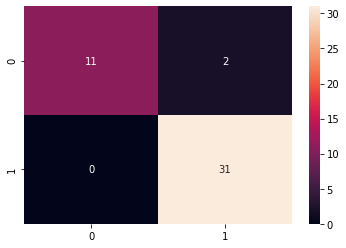

In [147]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_pred = model.predict(x_test)
y_pred = np.array([0 if n <= .5 else 1 for n in y_pred])
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm,annot=True,fmt="d")
acc = accuracy_score(y_test, y_pred)
print('The accuracy is: %.2f' % acc)
print('f1 score : %.2f '% f1_score(y_test, y_pred))